# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [ ]:
!echo "deb http://downloads.skewed.de/apt focal main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

Executing: /tmp/apt-key-gpghome.Gvi1GSWYHR/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:4 http://downloads.skewed.de/apt focal InRelease [7,535 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:10 http://archive.ubuntu.com/ubuntu focal InRelease
G

In [ ]:
# Colab uses a Python install that deviates from the system's! Bad collab! We need some workarounds.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 39 not upgraded.
After this operation, 270 kB disk space will be freed.
(Reading database ... 126021 files and directories currently installed.)
Removing python3-cairo:amd64 (1.16.2-2ubuntu2) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | 

# graph-tool 



In [ ]:
from graph_tool.all import *
import graph_tool as gt


/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1544: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from partially initialized module 'gi' (most likely due to a circular import) (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
pip install python-igraph

The graph contains 20000 nodes and 57639308 edges. A link between two nodes (users) indicates that they are members of a least one common Facebook group. A weight of an edge indicates the number of common groups where the two-end point users are members of. The distribution of number of common groups is as follows:
`57349483`, `285047`, `4778`, `0`, where the first indicates one shared group while the last refers to 4 shared groups at the same time.

**Loading the Graph**

In [ ]:
G = gt.load_graph_from_csv('e_list.csv', skip_first=True)

In [ ]:
print(G.num_vertices(), G.num_edges())

20000 57639308


**Degree Distribution Analysis**



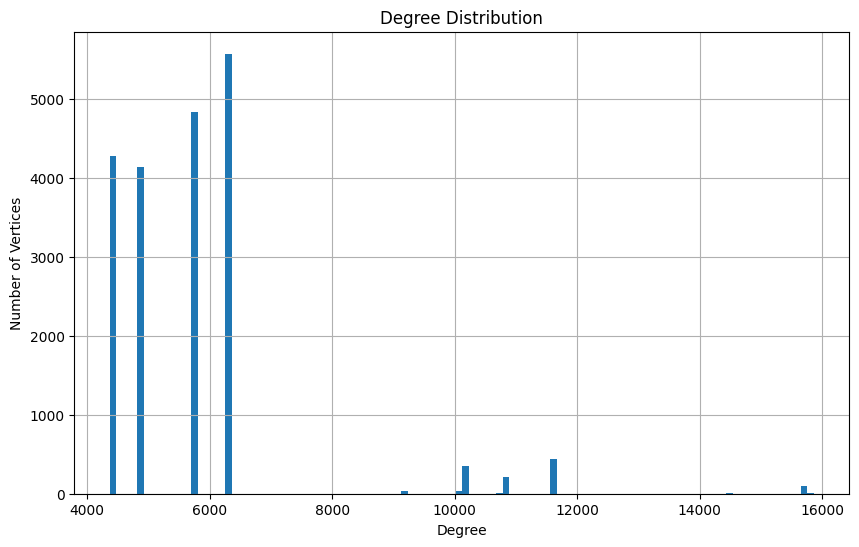

In [ ]:
import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt

# Calculate the degree of each vertex
degrees = G.degree_property_map("total").a

# Compute the degree distribution
degree_counts, bin_edges = np.histogram(degrees, bins='auto', density=False)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], degree_counts, width=np.diff(bin_edges), align='edge')
plt.xlabel('Degree')
plt.ylabel('Number of Vertices')
plt.title('Degree Distribution')
plt.grid(True)
plt.show()


**Path Analysis**

In [ ]:
import graph_tool.all as gt

# Assuming you have already loaded or created your graph G

# Initialize the maximum shortest path length to 0
max_shortest_path_length = 0

# Calculate the shortest paths between all pairs of vertices
for v in G.vertices():
    shortest_paths = gt.shortest_distance(G, v)

    # Find the maximum shortest path length for the current vertex
    max_path_length = max(shortest_paths.a)

    # Update the overall maximum shortest path length
    if max_path_length > max_shortest_path_length:
        max_shortest_path_length = max_path_length

print("Graph diameter:", max_shortest_path_length)


Graph diameter: 2


**Centrality analysis**

In [ ]:
import igraph as ig
import pandas as pd

# Read the edge list from CSV
edge_list = pd.read_csv("e_list (2).csv")

# Create the graph from the edge list
graph = ig.Graph.TupleList(edge_list.itertuples(index=False), directed=False)

# Calculate degree centrality
degree_centrality = graph.degree()

# Calculate betweenness centrality
betweenness_centrality = graph.betweenness()

# Calculate closeness centrality
closeness_centrality = graph.closeness()

# Print centrality measures for each node
for node in graph.vs:
    print(f"Node {node.index}:")
    print("Degree Centrality:", degree_centrality[node.index])
    print("Betweenness Centrality:", betweenness_centrality[node.index])
    print("Closeness Centrality:", closeness_centrality[node.index])
    print("--------------------")


**Community Discovery**|

In [ ]:
import igraph as ig
import pandas as pd

# Read the edge list from CSV
edge_list = pd.read_csv("e_list (2).csv")

# Create the graph from the edge list
graph = ig.Graph.TupleList(edge_list.itertuples(index=False), directed=False)

# Apply the Louvain algorithm for community detection
communities = graph.community_multilevel()

# Print the number of detected communities
num_communities = len(communities)
print("Number of communities:", num_communities)

# Print the nodes in each community
for i, community in enumerate(communities, 1):
    print(f"Community {i}:")
    print(community)
    print("--------------------")


**Connected components analysis**

In [ ]:
import graph_tool.all as gt
from graph_tool import topology

# Step 7: Connected Components Analysis
labels = topology.label_components(G)[0]

# Get the number of connected components
num_connected_components = len(set(labels))

# Print the number of connected components
print("Number of Connected Components:", num_connected_components)

# Analyze the sizes of connected components
component_sizes = topology.label_components(G)[1]

# Print the size of each connected component
for i, size in enumerate(component_sizes):
    print(f"Connected Component {i+1}: Size = {size}")


Number of Connected Components: 1
Connected Component 1: Size = 20000


**Density analysis**

In [ ]:
# Step 8: Density Analysis
graph_density = 2 * G.num_edges() / (G.num_vertices() * (G.num_vertices() - 1))

# Print the density of the graph
print("Graph Density:", graph_density)


Graph Density: 0.2882109505475274


**Network Type**

In [ ]:
import graph_tool.all as gt

# Check if the graph has bidirectional edges
bidirectional_edges = False
for edge in G.edges():
    source, target = edge.source(), edge.target()
    if G.edge(target, source):
        bidirectional_edges = True
        break

# Determine the network type
if bidirectional_edges:
    print("Network Type: Undirected")
else:
    print("Network Type: Directed")
# Step 7: Connectivity Analysis
labels, hist = gt.label_components(G)

# Get the number of connected components
num_connected_components = len(hist)

# Print the connectivity status
if num_connected_components == 1:
    print("Graph is connected")
else:
    print("Graph is not connected")


Network Type: Undirected
Graph is connected


In [ ]:
import graph_tool.all as gt

# Check if the graph is homogeneous
is_homogeneous = True
degrees = G.degree_property_map("total").a

first_degree = degrees[0]  # Degree of the first node
for degree in degrees[1:]:
    if degree != first_degree:
        is_homogeneous = False
        break

if is_homogeneous:
    print("The graph is homogeneous.")
else:
    print("The graph is not homogeneous.")


The graph is not homogeneous.


**Clustring Coefficients**

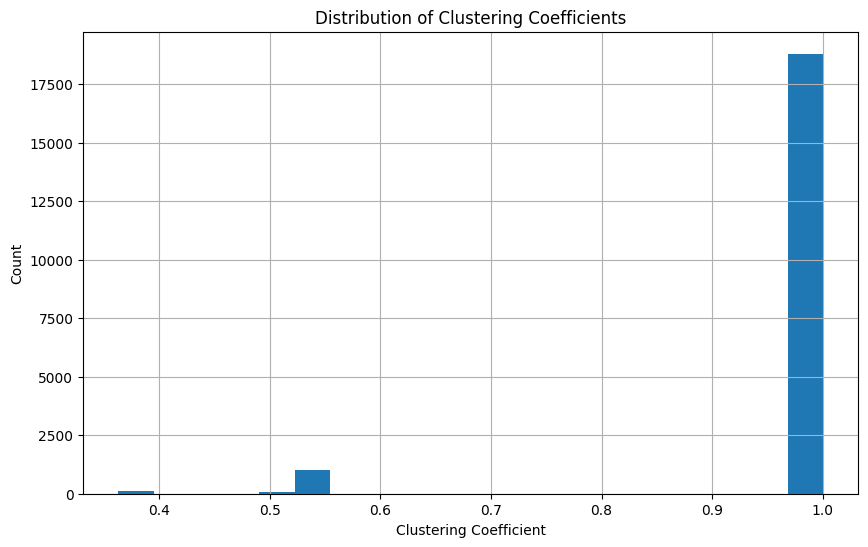

In [ ]:
import matplotlib.pyplot as plt

#Calculate the clustering coefficients
clustering_coeffs = gt.local_clustering(G)
#Analyze the distribution of clustering coefficients

#Here, you can use any desired method to analyze and visualize the clustering coefficients
#For example, you can plot a histogram of the clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(clustering_coeffs.a, bins=20)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Count')
plt.title('Distribution of Clustering Coefficients')
plt.grid(True)
plt.show()

In [ ]:
clustering_coeffs = gt.local_clustering(G)
for v in G.iter_vertices():
  node_id = int(v)
  clustering_coefficient = clustering_coeffs[v]
  print(f"Node {node_id}: Clustering Coefficient = {clustering_coefficient}")

In [ ]:
# Calculate clustering coefficients (triangles)
triangles = G.get_out_degrees(G.get_vertices())  # Triangles
print("Triangles:", triangles.sum())


Triangles: 115278616


In [ ]:
# Calculate the number of triangles for each vertex
triangles = G.get_out_degrees(G.get_vertices())

# Calculate the average number of triangles
average_triangles = triangles.sum() / G.num_vertices()

#Calculate the average number of triangles
average_triangles = triangles.sum() / G.num_vertices()

# Calculate the maximum number of triangles and the corresponding vertex ID
max_triangles = triangles.max()
vertex_id_max_triangles = int(triangles.argmax())

# Print the information
print("Average number of triangles:", average_triangles)
print("Maximum number of triangles:", max_triangles)
print("Vertex ID with the maximum number of triangles:", vertex_id_max_triangles)

Average number of triangles: 5763.9308
Maximum number of triangles: 15868
Vertex ID with the maximum number of triangles: 321


In [ ]:
transitivity = gt.clustering.global_clustering(G)

print("Transitivity:", transitivity)


Transitivity: (0.895609646462258, 0.0027147177162341303)


In [ ]:
import pandas as pd
from graph_tool import Graph
# Calculate average degree
average_degree = 2 * G.num_edges() / G.num_vertices()

# Calculate maximum degree and vertex ID
degrees = G.get_total_degrees()
max_degree = degrees.max()
vertex_id_max_degree = int(degrees.argmax())

# Print the characteristics
print("Average degree:", average_degree)
print("Maximum degree:", max_degree)
print("Vertex ID with the maximum degree:", vertex_id_max_degree)

Average degree: 5763.9308
Maximum degree: 15868
Vertex ID with the maximum degree: 321


In [ ]:
import graph_tool.all as gt

# Assuming you have already loaded or created your graph G

# Calculate the degrees of all vertices
degrees = G.degree_property_map("total")

# Initialize variables to track the maximum degree and its count
max_degree = 0
max_degree_count = 0

# Initialize variables to track the most abundant degree and its count
most_abundant_degree = 0
most_abundant_degree_count = 0

# Iterate over all vertices
for v in G.vertices():
    degree = degrees[v]
    
    # Check if the current degree is greater than the maximum degree
    if degree > max_degree:
        max_degree = degree
        max_degree_count = 1
    # Check if the current degree is equal to the maximum degree
    elif degree == max_degree:
        max_degree_count += 1
    
    # Check if the current degree is greater than the most abundant degree
    if degree > most_abundant_degree:
        most_abundant_degree = degree
        most_abundant_degree_count = 1
    # Check if the current degree is equal to the most abundant degree
    elif degree == most_abundant_degree:
        most_abundant_degree_count += 1

print("Degree with the maximum number of vertices:", max_degree)
print("Number of vertices having the most abundant degree:", most_abundant_degree_count)


Degree with the maximum number of vertices: 15868
Number of vertices having the most abundant degree: 5


**Graph Visualization**

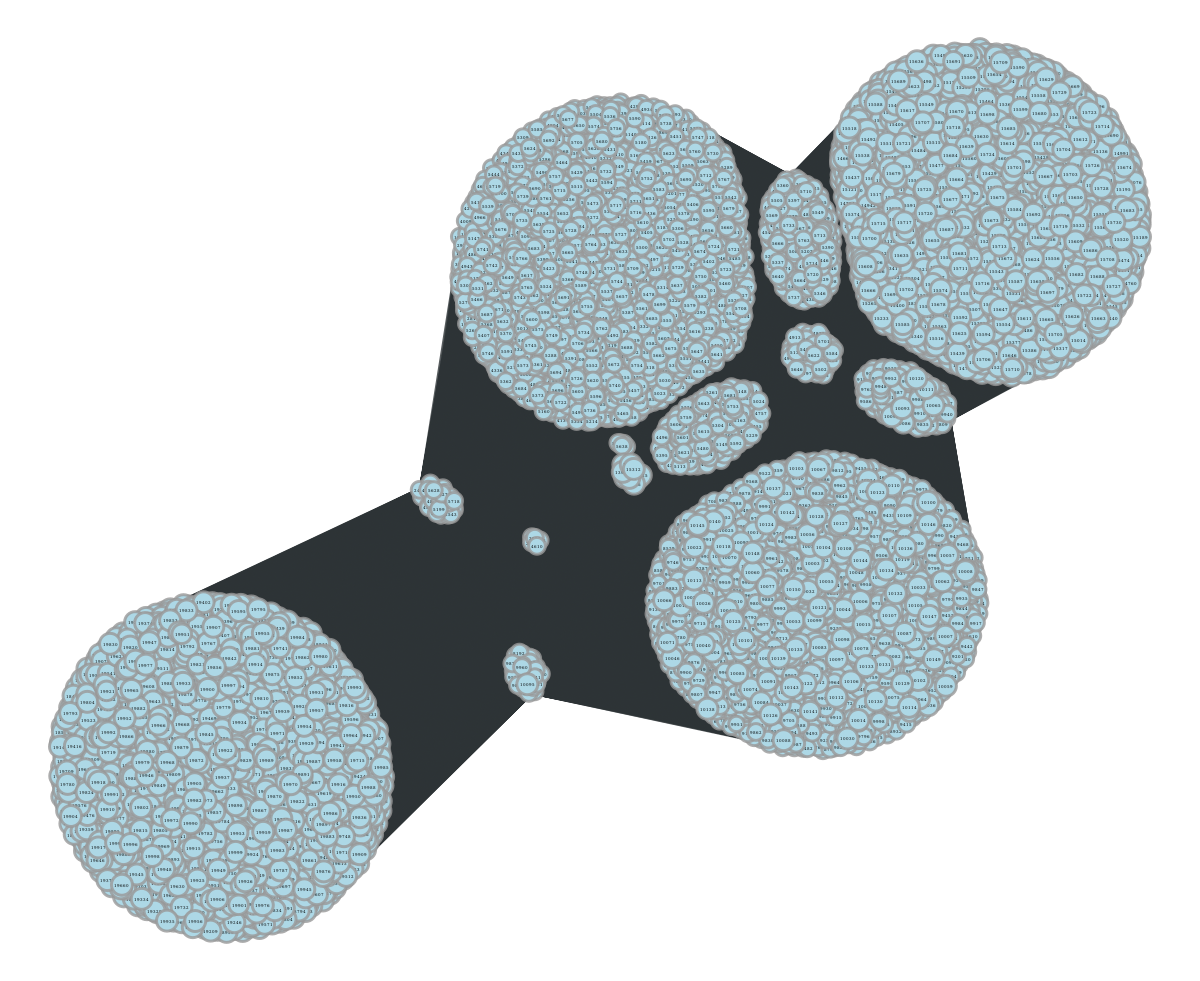

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc525ec56c0, at 0x7fc4e3f39bd0>

In [ ]:
import graph_tool.all as gt
from graph_tool import draw

# Create a layout for the graph
pos = gt.sfdp_layout(G)

# Set up the visual properties of the graph
vprops = {
    "size": 5,
    "fill_color": "blue",
    "text_color": "white",
    "text_position": 0,
    "text_font_size": 2
}

eprops = {
    "pen_width": 1.5
}

# Draw the graph
draw.graph_draw(G, pos=pos, vertex_text=G.vertex_index, vertex_font_size=2, vertex_shape="circle",
                vertex_fill_color="lightblue", vertex_pen_width=1.5, edge_pen_width=1.0)
